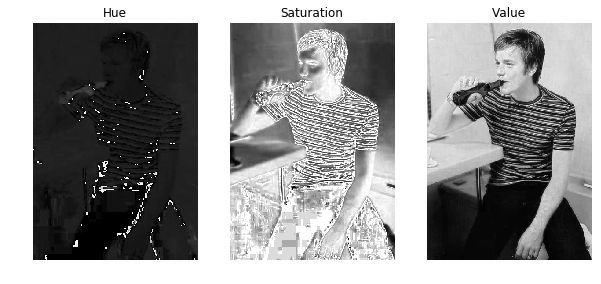

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 


pic_file = 'ewan.jpg'

img_bgr = cv2.imread(pic_file, cv2.IMREAD_COLOR)

img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_h = img_hsv[..., 0]
img_s = img_hsv[..., 1]
img_v = img_hsv[..., 2]

fig = plt.gcf()                      # 分通道显示图片
fig.set_size_inches(10, 15)
'''
plt.subplot(221)
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Original Picture')'''


plt.subplot(131)
plt.imshow(img_h, cmap='gray')
plt.axis('off')
plt.title('Hue')

plt.subplot(132)
plt.imshow(img_s, cmap='gray')
plt.axis('off')
plt.title('Saturation')

plt.subplot(133)
plt.imshow(img_v, cmap='gray')
plt.axis('off')
plt.title('Value')

plt.show()


C:\Users\weiq6\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


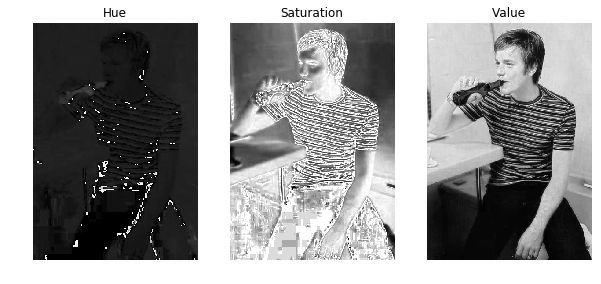

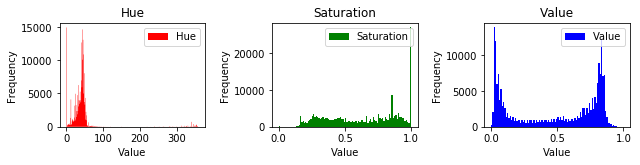

In [23]:
import scipy
import cv2
from scipy import ndimage
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
from scipy import misc
import scipy.misc
%matplotlib inline 

pic_file = 'ewan.jpg'

img_bgr = cv2.imread(pic_file, cv2.IMREAD_COLOR)

img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_h = img_hsv[..., 0]
img_s = img_hsv[..., 1]
img_v = img_hsv[..., 2]

fig = plt.gcf()                      # 分通道显示图片
fig.set_size_inches(10, 15)
'''
plt.subplot(221)
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Original Picture')'''


plt.subplot(231)
plt.imshow(img_h, cmap='gray')
plt.axis('off')
plt.title('Hue')

plt.subplot(232)
plt.imshow(img_s, cmap='gray')
plt.axis('off')
plt.title('Saturation')

plt.subplot(233)
plt.imshow(img_v, cmap='gray')
plt.axis('off')
plt.title('Value')

img = scipy.misc.imread("ewan.jpg")
array=np.asarray(img)
arr=(array.astype(float))/255.0
img_hsv = colors.rgb_to_hsv(arr[...,:3])

plt.figure(figsize=(9, 4))

lu1=img_hsv[...,0].flatten()
plt.subplot(234)
plt.hist(lu1*360,bins=360,range=(0.0,360.0),histtype='stepfilled', color='r', label='Hue')
plt.title("Hue")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()

lu2=img_hsv[...,1].flatten()
plt.subplot(235)                  
plt.hist(lu2,bins=100,range=(0.0,1.0),histtype='stepfilled', color='g', label='Saturation')
plt.title("Saturation")   
plt.xlabel("Value")    
plt.ylabel("Frequency")
plt.legend()

lu3=img_hsv[...,2].flatten()
plt.subplot(236)                  
plt.hist(lu3,bins=100,range=(0.0,1.0),histtype='stepfilled', color='b', label='Value')
plt.title("Value")   
plt.xlabel("Value")    
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

In [49]:
# Read image
im = cv2.imread('ewan.jpg')
im = np.float32(im) / 255.0
 
# Calculate gradient 
gx = cv2.Sobel(im, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(im, cv2.CV_32F, 0, 1, ksize=1)
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

In [50]:
gx = np.fabs(gx)
gy = np.fabs(gy)

In [54]:
cv2.imshow('image',gx)
cv2.waitKey(0)

-1

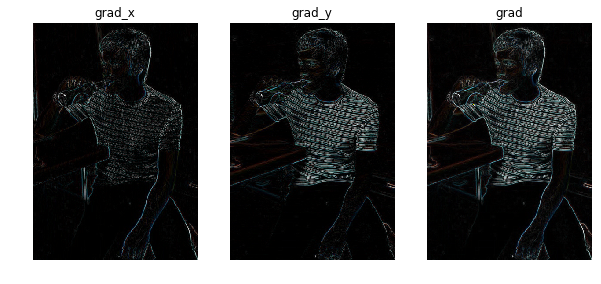

In [56]:
fig = plt.gcf()                      # 分通道显示图片
fig.set_size_inches(10, 15)

plt.subplot(131)
plt.imshow(gx)
plt.axis('off')
plt.title('grad_x')

plt.subplot(132)
plt.imshow(gy)
plt.axis('off')
plt.title('grad_y')

plt.subplot(133)
plt.imshow(mag)
plt.axis('off')
plt.title('grad')

plt.imshow(mag)
plt.show()

In [76]:
im = cv2.imread('ewan_resize.jpg')


In [77]:
np.shape(im)

(127, 83, 3)

In [78]:
im[0][0][1]

199

In [81]:
for i in range(127):
    for j in range(83):
        if i % 8 == 0 or j % 8 == 0:
            im[i][j][0] = 0
            im[i][j][1] = 100
            im[i][j][2] = 0

In [82]:
cv2.imshow('image',im)
cv2.waitKey(0)

-1

In [94]:
im = im[0:8,48:56]
np.shape(im)

(8, 8, 3)

In [98]:
newimage = res=cv2.resize(im,(500,500),interpolation=cv2.INTER_CUBIC)
cv2.imwrite("tmp.jpg", newimage) 
cv2.imshow('image',newimage)
cv2.waitKey(0)

-1

In [135]:
im = cv2.imread('ewan_resize.jpg')


In [136]:
im = np.float32(im) / 255.0
 
# Calculate gradient 
gx = cv2.Sobel(im, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(im, cv2.CV_32F, 0, 1, ksize=1)
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

In [137]:
mag = mag[0:8,48:56]
angle = angle[0:8,48:56]
np.shape(angle)

(8, 8, 3)

In [138]:
g = np.zeros((8,8))
a = np.zeros((8,8))
for i in range(8):
    for j in range(8):
        g[i][j] = int(round(np.max(mag[i][j]) * 256))
        a[i][j] = angle[i][j][np.argmax(mag[i][j])]
        a[i][j] = int(round(a[i][j]))
        if a[i][j] >= 180:
            a[i][j] = a[i][j] - 180

In [139]:
histogram = [0,0,0,0,0,0,0,0,0]
for i in range(8):
    for j in range(8):
        size = g[i][j]
        deg = a[i][j]
        if deg % 20 == 0:
            histogram[int(deg / 20)] = histogram[int(deg/20)] + size
        else:
            i1 = int(deg / 20)
            i2 = i1 + 1
            left = deg - i1 * 20
            right = i2*20 - deg
            histogram[i1] = histogram[i1] + size*right/(left+right)
            if(i2==9):
                i2 = 0
            histogram[i2] = histogram[i2] + size*left/(left+right)

In [140]:
histogram

[143.4,
 63.050000000000004,
 49.199999999999996,
 347.0,
 948.35,
 1032.25,
 865.5000000000001,
 118.30000000000001,
 24.95]

In [ ]:

graph = np.zeros((3,3,1),dtype=numpy.int8)
